# Data exploration regarding strategies to deal with the Covid-19 outbreak
## by Leopold Walther

## Preliminary Wrangling

The main question which made me start the analysis is: What is the best strategy for a state to battle the Covid-19 outbreak. There are several debates on how to act on overcoming this global pandemic. 
There is broad agreement that the spread of the virus can only be contained in the long term by functioning vaccines. We do not know today how long it will take until a vaccine is available sufficient amount. Nor do we know whether this vaccine, which was developed based on viruses isolated today, will cover all future mutations of the virus. So how do we deal with the virus while there is no vaccine yet? Are we going to stop the population from being infected with the virus by taking tough measures to prevent the number of serious cases of disease, deaths and the collapse of the health system? Measures such as shutdowns, however, in turn have a strong impact on the economy. Another approach is to achieve herd immunity without a vaccine. There are first indications that people who have survived the disease develop immunity. If 66% of the population develops such immunity, the spread of Covid-19 can be contained. But here again, the probability of the virus mutating increases with the number of people infected. People who were immune to an older version of the disease may reinfect themselves with a sufficiently mutated version. 
There are goverments that want to prevent overburdening of the health system through the lockdown like the spanish or german, while other countries rely on the responsibility of the individual without major restrictions, namely the swedish. Futhermore, there are governments that evaluate the economic damage through a lockdown more dramatically than the effects of the virus itself. Data was gathered from Wikipedia, Gapminder and the John Hopkins University. The amount of confirmed cases of Covid-19, deaths and recovered of the John Hopkins Data paired with information like intensive care beds retrieved from wikipedia ist the basis of this analysis. With this data the outbreaks timelines of different countries can be compared in the context of their strategies.

In [1]:
# One dimensional
    #Countries with highest death rates (bar chart) --> what is real death rate?
    #

# Two dimensional
    # Corona Virus Cases overt time per country line? (umeric discrecte vs numeric continouos) --> zoom in on not extreme countries
    # R-factor of countries over time
    # monthly/weekly deaths compared to "normal years" --> Sweden compared to other nordic countries

# Multi dimensional
    # comparison of share of single person households, share of population over 65, 
        #population per sqm, percentage living in cities, diabetes
        # Heatmap Countries cases?? https://medium.com/@tomaspueyo/coronavirus-learning-how-to-dance-b8420170203e
        
# other constructions
    # How long would it last to make 2/3 immun without vaccine? -->
    # Minimum Deaths when all infected and no vaccine, but enough medical care vs maximum death when hospitals overhelmed



Import Packages for visual exploration:

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sb

Load dataset, prepared in gather_clean_Covid19:

In [3]:
# Read Covid-19 data from csv
df_covidCases_Timeline = pd.read_csv('outputData/df_covidCases_Timeline.csv')
df_covidTests_Snapshot = pd.read_csv('outputData/df_covidTests_Snapshot.csv')
df_countryMetrics_Snapshot = pd.read_csv('outputData/df_countryMetrics_Snapshot.csv')
df_householdsEU_Timeline = pd.read_csv('outputData/df_householdsEU_Timeline.csv')
df_hospitals_Snapshot = pd.read_csv('outputData/df_hospitals_Snapshot.csv')
df_populationDelta_Timeline = pd.read_csv('outputData/df_populationDelta_Timeline.csv')

In [4]:
# Datatype datetime gets lost with write & read csv
df_covidCases_Timeline.date=pd.to_datetime(df_covidCases_Timeline.date)

In [5]:
# Check if datatype of date now correct
df_covidCases_Timeline.dtypes

Unnamed: 0             int64
country               object
date          datetime64[ns]
fatal                  int64
confirmed              int64
recovered              int64
iso_code              object
dtype: object

In [6]:
# Get dates of today and yesterday depending on day script is run

#today = pd.to_datetime(date.today())
#yesterday = pd.to_datetime(date.today() - timedelta(days=3))

# To not have changing graphs every day I will take May 18th as date
dateSnapshot = pd.to_datetime('2020-05-17')

### Structure of your datasets

There are six datasets in this analysis. 
Base of this analysis is the dataset df_covidCases_Timeline containing the data related to the spread of Covid-19 over time. Each row holds the following variables for one country on one date: accumulated confirmed cases of Covid-19, accumulated fatal cases related to Covid-19 and cases recovered from Covid-19. There are 20,475 observations in this dataset on May 18th 2020. This data is gathered by the [John Hopkins University](https://hub.jhu.edu/novel-coronavirus-information/) and daily updated with new observations. All variables but country names are of numeric nature.
This dataset is complemented by another dataset df_covidTests_Snapshot by the [Unitversity of Oxford](https://ourworldindata.org/about) tracking tests perfomed by countries. The dataset df_covidTests_Snapshot only contains the most recent values available for 92 countries.
Further numeric statistics like population size or area of 207 countries is part of the dataframe df_countryMetrics_Snapshot.
The dataframe df_householdsEU_Timeline holds ordinal categorical data regarding the distribution of the population among household sizes. Household sizes, 1 person, 2 persons, 3 persons, 4 persons, 5 persons, 6 persons or more.
Further information in numeric form about hospital beds, for example existing intensive care units per countries are in the dataframe df_hospitals_Snapshot.
Reference data regarding birth and death rates of countries month wise over the past years is available in df_populationDelta_Timeline. With this data it will be possible to determine the mortality displacement for the year 2020, probably caused by Covid-19 or secondary effects of the pandemic.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the differences in the spread of Covid-19 among the northern european countries and Germany. These countries have similar cultures, weather and household situations. Therefore I see them fit for a comparison of strategies. How did Sweden perform as a country with very soft measures regarding lockdown against the Covid-19 pandmic compared to the other nordic countries and Germany.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect to see a lower mortality rate among the countries with soon implemented strong measures. The sooner and firmer measures were taken I expect to see a stronger decrease in new cases.


First of all, what country did take what measure when:

- Denmark: 
    - political measures: since 14 March 2020, ban on meetings for more than ten people.
    - school closing: since 14 March 2020 Schools, kindergartens closed.
    - further measures: since 14 March 2020 Restaurants, cafés and leisure facilities.
    
- Germany:
    - school closing: since 16 March 2020 Schools, day care centres.
    - further measures: since 13 March 2020 major events are forbidden, since 23 March 2020 comprehensive ban on contact, catering businesses (except take-away food and beverages), service companies in the personal hygiene sector (e.g. hairdressers).
   
- France:
    - school closing: since 16 March 2020 schools, universities and day care centres.
    - further measures: facilities open to the public were closed down (shops, restaurants, etc.) since 16 March 2020.
    
- Italy: 
    - political measures: on 22 February 2020 Friuli-Venezia Giulia was the first Italian region to declare a state of emergency.
    - school closing: since 10 March 2020 nationwide schools and universities.
    - further measures: on 22 February 2020 the carnival in Venice was prematurely terminated, since 9 March 2020 movement restrictions throughout Italy, since 12 March 2020 closure of all Catholic churches in Rome (Vatican decree).
    
- Norway:
    - school closing: since 13 March 2020 Kindergartens, schools and universities.
    
- Spain:
    - political measures: since 16 March 2020 Emergency. 
    - further measures: since 16 March 2020, all establishments open to the public (shops, restaurants), except grocery stores and pharmacies.

[Wikipedia](https://de.wikipedia.org/wiki/COVID-19-Pandemie#Maßnahmen_in_der_EU)
    

In the following graphic countries in dark blue have issued a nationwide lockdown, light blue issued decentralistic lockdowns and grey stayed without lockdown (by May 18th 2020).

<img src="img/COVID-19_Outbreak_lockdowns.svg"> [Wikipedia](https://de.wikipedia.org/wiki/COVID-19-Pandemie#/media/Datei:COVID-19_Outbreak_lockdowns.svg)

In this analysis I will concentrate on comparing nordic countries, as the housing situation (see visualization at end of this document) here favors lockdowns. These countries are the ones with the highest percentage of one-person households. Meaning, if there is a person with Covid-19 in lockdown, there is no room mate or family to infect. But more to that later.

In [7]:
# Get current data of Covid cases without history
df_covidCases_today = df_covidCases_Timeline.query('date == @dateSnapshot')

In [8]:
# Merge addtional info
df_countryMetrics_Snapshot.drop(['Unnamed: 0', 'iso_code'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_countryMetrics_Snapshot, on=['country'])

df_covidTests_Snapshot.drop(['Unnamed: 0', 'ISO code', 'date'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_covidTests_Snapshot, on=['country'])

df_hospitals_Snapshot.drop(['Unnamed: 0', 'continent'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_hospitals_Snapshot, on=['country'])

df_covidCases_today.drop(['Unnamed: 0'], axis=1, inplace=True)

#df_covidCases_today = df_covidCases_today.drop_duplicates()

In [9]:
# Countries of interest (European countries with more than 40% 1-person households)

northern_european = ['Norway', 'Denmark', 'Germany', 'Sweden']

## Univariate Exploration

I will start by looking into the most recent available numbers of confirmed Covid-19 cases per country and different approaches to measure the mortality.
The novel Sars-CoV-2 virus spread all over the world in only a few months. It is still not clear what the mortality rate of Covid-19 is, furhermore this rate may vary depending on the country. Covid-19 is the loung desease caused by the Sars-CoV-2 virus. I will use the data collected by John Hopkins University on confirmed cases and fatal cases of Covid-19 to compare how hard countries are hit by the spread of the virus and the consequences. 

In [10]:
# Drop all countries which are not of interest in this analysis

df_covidCases_today = df_covidCases_today[df_covidCases_today['country'].isin(northern_european)]

In [11]:
# Set color palette to just one
base_color = sb.color_palette()[0]

#### Confirmed cases of Covid-19 per country

In [12]:
df_covidCases_today.set_index('country', inplace=False).population

country
Norway      5421242
Sweden     10099270
Denmark     5792203
Germany    83783945
Name: population, dtype: int64

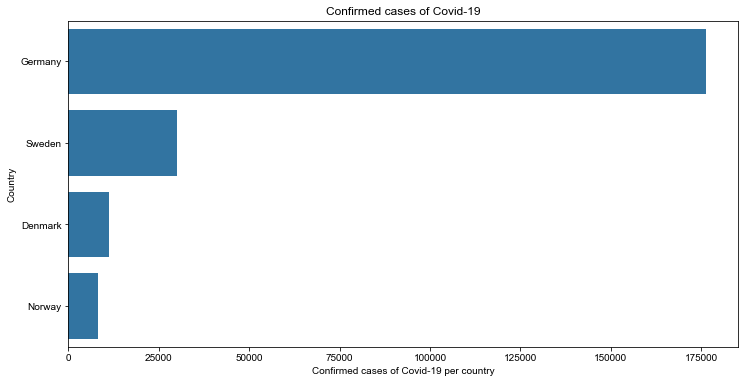

In [13]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmed', ascending=False), 
           x='confirmed', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Confirmed cases of Covid-19 per country')
plt.ylabel('Country');
plt.title('Confirmed cases of Covid-19')  # <-- how can I put variable 'today' hier?

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

In this comparison of confirmed cases per country, a snapshot of the data at may 17th 2020, we see that Germany has clearly the most confirmed cases with few more than 175000. Next among the countries visualized in this graphic is Sweden with more than 30000 cases of confirmed Covid-19 infections. Denmark and Norway report each less than 12000 cases.
This is metric does not give a good insight on how hard a country is hit by a pandemic, as countries with big populations can have more infected people. So insted of looking at the absolute value of infected people, let's compare the same countries with the number of confirmed Covid-19 infections normalized on one million people. 

#### Confirmed cases of Covid-19 per 1 million population in northern european countries

In [14]:
# Feature Engineering

# Create column fatal per confirmed
df_covidCases_today['confirmedPer1MPopulation'] = df_covidCases_today.confirmed * 1000000 / df_covidCases_today.population

In [15]:
df_covidCases_today.sort_values('confirmedPer1MPopulation', ascending=False).confirmedPer1MPopulation

17    2984.671169
41    2105.045304
32    1920.685446
2     1521.607041
Name: confirmedPer1MPopulation, dtype: float64

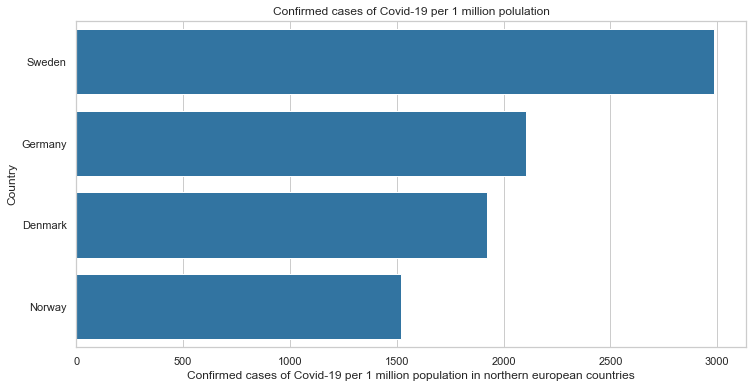

In [16]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmedPer1MPopulation', ascending=False), 
           x='confirmedPer1MPopulation', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Confirmed cases of Covid-19 per 1 million population in northern european countries')
plt.ylabel('Country');
plt.title('Confirmed cases of Covid-19 per 1 million polulation')  # <-- how can I put variable 'today' hier?

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

The graphic above shows the confirmed cases of each country per one million inhabitants. Here we can see a different ranking compared to the graphic with absolute amount of confirmed Covid-19 cases. Sweden with almost 3000 cases per one million inhabitants has by far the highest rate. Next with roughly 2100 cases per one million inhabitants is Germany followed by Denmark with 1920. Norway with about 1500 confirmed cases per one million population have the lowest rate of the countries shown in this graphic. Infections are not necessarily dangerous, still some of those infected have to seek medical treatment and are at risk of long-term damage or even death. 
This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. The number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. When the decentrally collected figures are combined, delays or individual errors may introduce further uncertainties into the statistics. 
Let's look into the amount of tests performed by the countries examined.

In [17]:
 # Drop all countries which are not of interest in this analysis

df_covidTests_Snapshot_NC = df_covidTests_Snapshot[df_covidTests_Snapshot['country'].isin(northern_european)]

In [18]:
df_covidTests_Snapshot_NC.head()

,Entity,Cumulative total,Cumulative total per thousand,country
17,Denmark - people tested,412051,71.139,Denmark
24,Germany - tests performed,3147771,37.570,Germany
55,Norway - people tested,223045,41.143,Norway
77,Sweden - people tested,209900,20.784,Sweden


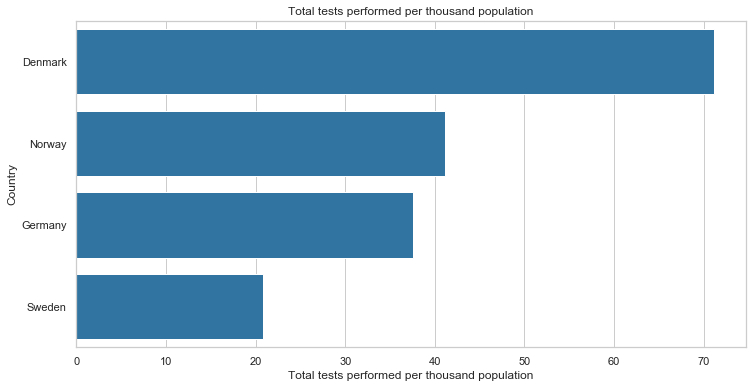

In [19]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidTests_Snapshot_NC.sort_values('Cumulative total per thousand', ascending=False), 
           x='Cumulative total per thousand', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Total tests performed per thousand population')
plt.ylabel('Country');
plt.title('Total tests performed per thousand population')  # <-- how can I put variable 'today' hier?

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

The graphic above shows the test performed by each nation per thousand inhabitants. Denmark with about 65 accumulated tests per 1000 population has the highest testing rate. Norway and Germany accumulated little less than 40 tests per 1000 population. Sweden has, by far the lowest test rate with less than 18 tests accumulated over 1000 population. 
Note here that each the data here is not completely comparable, where Denmark, Norway and Sweden declare the number of people tested, Germany counts tests performed.
Still, compared to Norway and Denmark the test coverage in Sweden is way lower meaning a higher probability of more divergence between known confirmed cases of Covid-19 and unknown cases of Covid-19 infeactions.
A high number of infected people per country itself is not yet a problem. It is problematic when people die from Covid-19 or suffer permanent lung damage from the disease. Furthermore, high amounts of hospitalized Covid-19 cases can overburden the national or regional health care system. A secondary effect of high infection rates and the associated high number of lung patients is that people avoid hospitalisation to not risk a infection. Hence, cases of other life-threatening diseases may not be treated due to fear of the patients or lack of capacity. 
We did see that Sweden has more than 
We have seen that Sweden has more than three times the number of confirmed Covid-19 cases compared to other Northern European countries. Is the ratio the same in relation to fatal cases related to Covid-19?

In [20]:
# Feature Engineering

# Create column fatal per confirmed
df_covidCases_today['fatalPerConfirmed'] = df_covidCases_today.fatal / df_covidCases_today.confirmed

#### Fatal cases related to Covid-19 in relation to the known infections of Covid-19

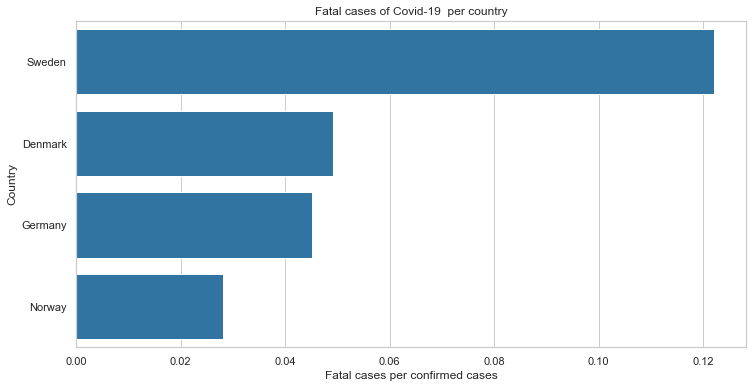

In [21]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('fatalPerConfirmed', ascending=False), 
           x='fatalPerConfirmed', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per confirmed cases')
plt.ylabel('Country');
plt.title('Fatal cases of Covid-19  per country')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()


Dividing the fatal cases of a country for the most recent available date by the confirmed cases of the same country and date gives a mortality rate. 
This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. This also applies to the number of deaths caused by Covid-19. Different countries and regions have different rules as to when a death is included in the statistics of deaths caused by Covid-19. 
Furhermore, the number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. When the decentrally collected figures are combined, delays or individual errors may introduce further uncertainties into the statistics. 
As we have seen in the graphic before, the tests performed per population in Sweden is significantly lower than in ther other countries analyzed. Therefore a higher mortality rate per confirmed cases might just be a consequence of fewer tests. To get the uncertainty of testing coverage out of the equation in the next graphic we will compare the rate of fatals per one million people for the northeuropean countries.

In [22]:
# Feature Engineering

# Create column deaths per 1 million population
df_covidCases_today['fatalPer1MPopulation'] = df_covidCases_today.fatal *1000000 / df_covidCases_today.population

#### Fatal cases related to Covid-19 per 1 million people in country

In [23]:
df_covidCases_today.sort_values('fatalPer1MPopulation', ascending=False).fatalPer1MPopulation

17    364.283755
41     95.030140
32     94.437298
2      42.794622
Name: fatalPer1MPopulation, dtype: float64

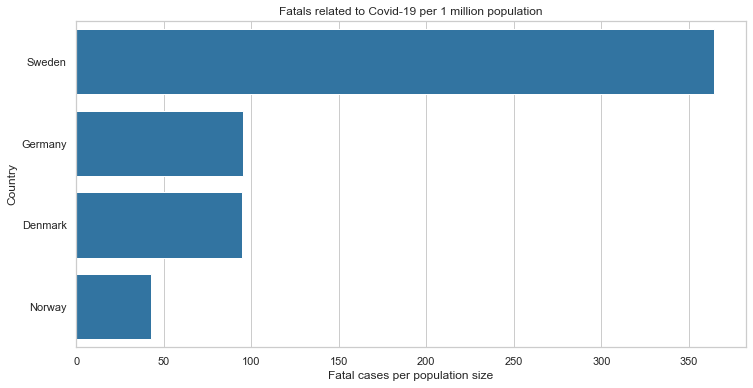

In [24]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('fatalPer1MPopulation', ascending=False), 
           x='fatalPer1MPopulation', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per population size')
plt.ylabel('Country');
plt.title('Fatals related to Covid-19 per 1 million population')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

Looking at fatals related to Covid-19 per 1 million popilation we see a similar distribution as when comparing fatal cases related to Covid-19 per confirmed cases of infections. Sweden has, by far the highest rate with more than 350 fatal cases per one million people, that is 0.035% of population. Next are Germany and Denmark with less than 100 fatal cases related to Covid-19 per one million inhabitants. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The amount confirmed Covid-19 cases and fatal casese related to Covid-19 as absolut numbers are not fit for a comparison among different countries, if they have different sizes of population. Dividing a metric like fatals related to Covid-19 by a countries population size leads to a very small rate, like for example 0.000095030139724 for Germany. These kind of rates are not intuitivly comparable. For that reason I divided all metrics regarding Covid-19 by the countries population size and multiplied them by one million. As example the result for Germany is 95 fatal cases related to Covid-19 per 1 million inhabitants. This way of presenting the same metric is easyer to grasp for readers.

## Bivariate Exploration

In the Univariate Exploration we looked at the absolute and relative amount of confirmed infections, fatals related to Covid-19 and tests. These metrices showed the situation of one certain time, May 18th 2020.
To start off with the Bivariate Exploration, I want to look at the changes over time of these numbers. How did the amount of new cases and fatals change over time?

In [25]:
df_countryMetrics_Snapshot.drop(['date'], axis=1, inplace=True)
df_covidCases_Timeline = pd.merge(df_covidCases_Timeline, df_countryMetrics_Snapshot, on=['country'])

In [26]:
# Feature Engineerig: Create column with new confirmed cases per day

df_Norway = df_covidCases_Timeline.query('country == "Norway"').sort_values('date', ascending=False)
df_Norway['deltaConfirmed'] = (df_Norway['confirmed'] - df_Norway['confirmed'].shift(-1)).fillna(0).astype(int)

df_Denmark = df_covidCases_Timeline.query('country == "Denmark"').sort_values('date', ascending=False)
df_Denmark['deltaConfirmed'] = (df_Denmark['confirmed'] - df_Denmark['confirmed'].shift(-1)).fillna(0).astype(int)

df_Germany = df_covidCases_Timeline.query('country == "Germany"').sort_values('date', ascending=False)
df_Germany['deltaConfirmed'] = (df_Germany['confirmed'] - df_Germany['confirmed'].shift(-1)).fillna(0).astype(int)

df_Sweden = df_covidCases_Timeline.query('country == "Sweden"').sort_values('date', ascending=False)
df_Sweden['deltaConfirmed'] = (df_Sweden['confirmed'] - df_Sweden['confirmed'].shift(-1)).fillna(0).astype(int)

#### Daily new confirmed cases of Covid-19 per country

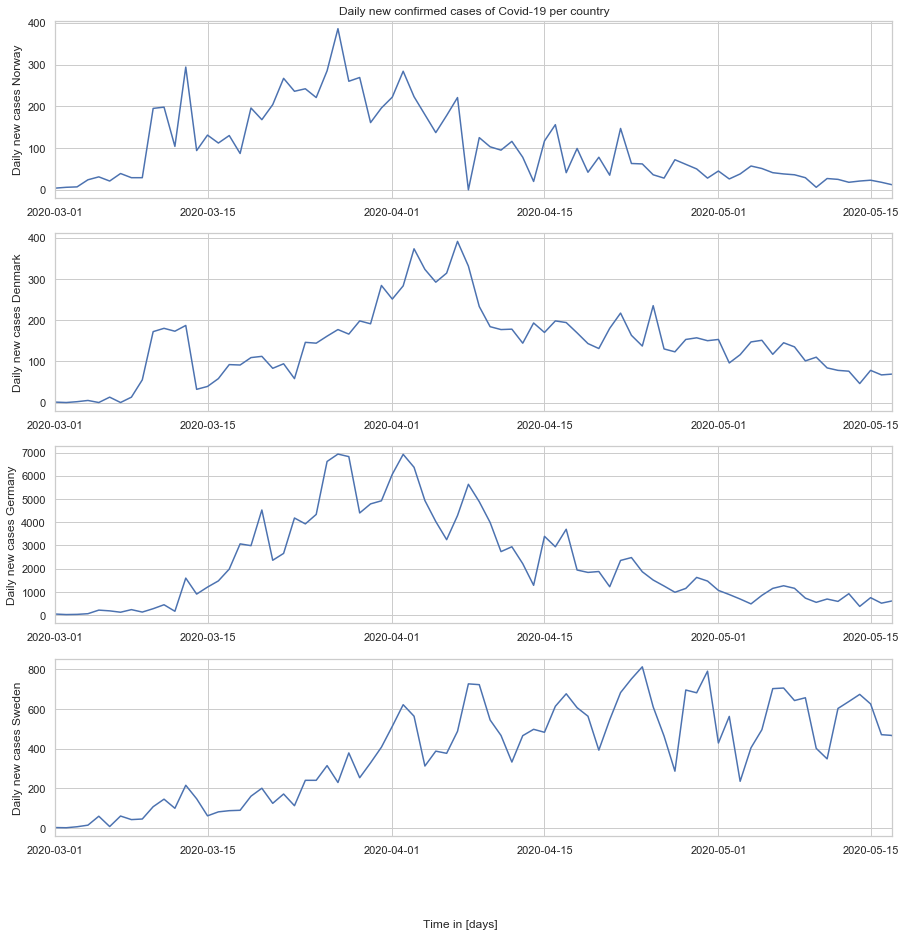

In [28]:
# new confirmed cases per day

fig, ax = plt.subplots(5, 1, figsize=(15,15))

ax1 = plt.subplot(4,1,1)
plt.plot('date', 'deltaConfirmed', data=df_Norway)
ax1.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Norway');
plt.title('Daily new confirmed cases of Covid-19 per country')  # <-- how can I put variable 'today' hier?

ax2 = plt.subplot(4,1,2)
plt.plot('date', 'deltaConfirmed', data=df_Denmark)
ax2.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Denmark');

ax3 = plt.subplot(4,1,3)
plt.plot('date', 'deltaConfirmed', data=df_Germany)
ax3.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Germany');

ax4 = plt.subplot(4,1,4)
plt.plot('date', 'deltaConfirmed', data=df_Sweden)
ax4.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Sweden');

fig.text(0.5, 0.04, 'Time in [days]', ha='center')

plt.show()

The visualization above shows the daily amount of new confirmed cases of Covid-19 per country over time. All countries shown, have a few confirmed cases already at the beginning of March 2020. Over March and April we see increasing numbers of confirmed cases in all considered countries. For Norway the amount of daily new cases decreases starting with end of March 2020. In Denmark and Germany starting from April 2020 daily new cases of Covid-19 decrease. Sweden does not seem to continuously decrease the daily new confirmed cases of Covid-19. Again the metrics in absolute numbers make the comparison hard and result into different scalings of the y-axis. Therefore in the the next graphic we will compare the daily new cases of Covid-19 per 1 million population.

In [29]:
# Feature Engineering: Infections per 1 million population

# HOW WOULD A FUNCTION LOOK LIKE HERE TO NOT COPY PASTE THE CODE X TIMES LIKE BELOW?

df_Norway['deltaConfirmedPer1M'] = df_Norway['deltaConfirmed'] *1000000 / df_Norway['population']

df_Denmark['deltaConfirmedPer1M'] =  df_Denmark['deltaConfirmed'] *1000000 / df_Denmark['population']

df_Germany['deltaConfirmedPer1M'] =  df_Germany['deltaConfirmed'] *1000000 / df_Germany['population']

df_Sweden['deltaConfirmedPer1M'] =  df_Sweden['deltaConfirmed'] *1000000 / df_Sweden['population']

#### Daily new confirmed cases of Covid-19 per one million people per country

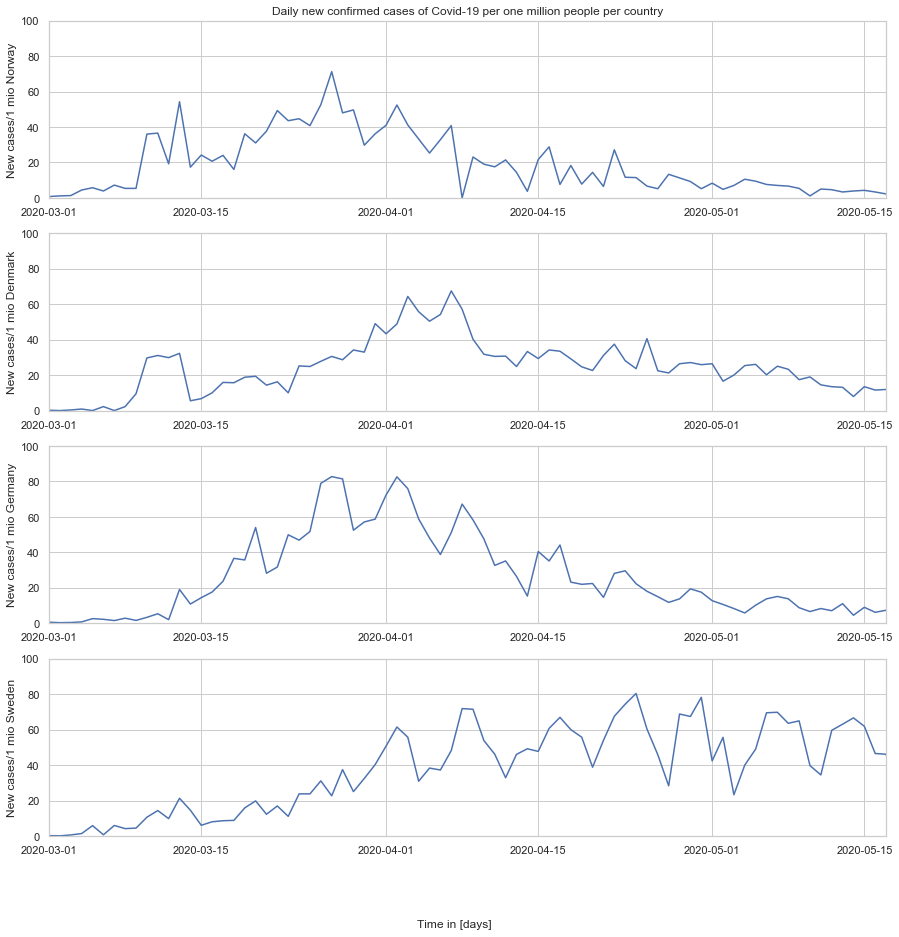

In [30]:
# new confirmed cases per 1m people and day

fig, ax = plt.subplots(5, 1, figsize=(15,15))
  
ax1 = plt.subplot(4,1,1)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Norway)
ax1.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax1.set_ylim([0,100])
plt.ylabel('New cases/1 mio Norway');
plt.title('Daily new confirmed cases of Covid-19 per one million people per country')  # <-- how can I put variable 'today' hier?

ax2 = plt.subplot(4,1,2)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Denmark)
ax2.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax2.set_ylim([0,100])
plt.ylabel('New cases/1 mio Denmark');

ax3 = plt.subplot(4,1,3)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Germany)
ax3.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax3.set_ylim([0,100])
plt.ylabel('New cases/1 mio Germany');

ax4 = plt.subplot(4,1,4)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Sweden)
ax4.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax4.set_ylim([0,100])
plt.ylabel('New cases/1 mio Sweden');

fig.text(0.5, 0.04, 'Time in [days]', ha='center')


plt.show()

We see the same curve progressions, just that this time there are equal scalings for all countries. Still the progressions seem to have some jitter. This may be consequence of the way the data is gathered. New cases are reported by the local hospitals and send to the responsible national institute to make a national statistic. Cases reported from hospitals Fridays or weekends may go into national statistics only by monday as these institutes may have lower workforce on weekends. 
For Denmark, Germany and Norway we know that measures as school closing and other bans on bigger gatherings of people were issued around 13th to 16th March.
For Norway the amount of daily new cases decreases starting with end of March 2020. In Denmark and Germany starting from April 2020 daily new cases of Covid-19 decrease.
It seems that there are about two weeks of time delay from issueing strict measures to seeing a difference in the data of confirmed new cases of Covid-19.

In [31]:
list(df_Norway)

['Unnamed: 0',
 'country',
 'date',
 'fatal',
 'confirmed',
 'recovered',
 'iso_code',
 'continent',
 'population',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_100k',
 'deltaConfirmed',
 'deltaConfirmedPer1M']

In [32]:
# Feature Engineerig: Create column with new confirmed cases per day

df_Norway = df_covidCases_Timeline.query('country == "Norway"').sort_values('date', ascending=False)
df_Norway['deltaFatal'] = (df_Norway['fatal'] - df_Norway['fatal'].shift(-1)).fillna(0).astype(int)

df_Denmark = df_covidCases_Timeline.query('country == "Denmark"').sort_values('date', ascending=False)
df_Denmark['deltaFatal'] = (df_Denmark['fatal'] - df_Denmark['fatal'].shift(-1)).fillna(0).astype(int)

df_Germany = df_covidCases_Timeline.query('country == "Germany"').sort_values('date', ascending=False)
df_Germany['deltaFatal'] = (df_Germany['fatal'] - df_Germany['fatal'].shift(-1)).fillna(0).astype(int)

df_Sweden = df_covidCases_Timeline.query('country == "Sweden"').sort_values('date', ascending=False)
df_Sweden['deltaFatal'] = (df_Sweden['fatal'] - df_Sweden['fatal'].shift(-1)).fillna(0).astype(int)

In [33]:
# Feature Engineering: Infections per 1 million population

# HOW WOULD A FUNCTION LOOK LIKE HERE TO NOT COPY PASTE THE CODE X TIMES LIKE BELOW?

df_Norway['deltaFatalPer1M'] = df_Norway['deltaFatal'] *1000000 / df_Norway['population']

df_Denmark['deltaFatalPer1M'] =  df_Denmark['deltaFatal'] *1000000 / df_Denmark['population']

df_Germany['deltaFatalPer1M'] =  df_Germany['deltaFatal'] *1000000 / df_Germany['population']

df_Sweden['deltaFatalPer1M'] =  df_Sweden['deltaFatal'] *1000000 / df_Sweden['population']

#### Daily new fatal cases related to Covid-19 per one million people per country

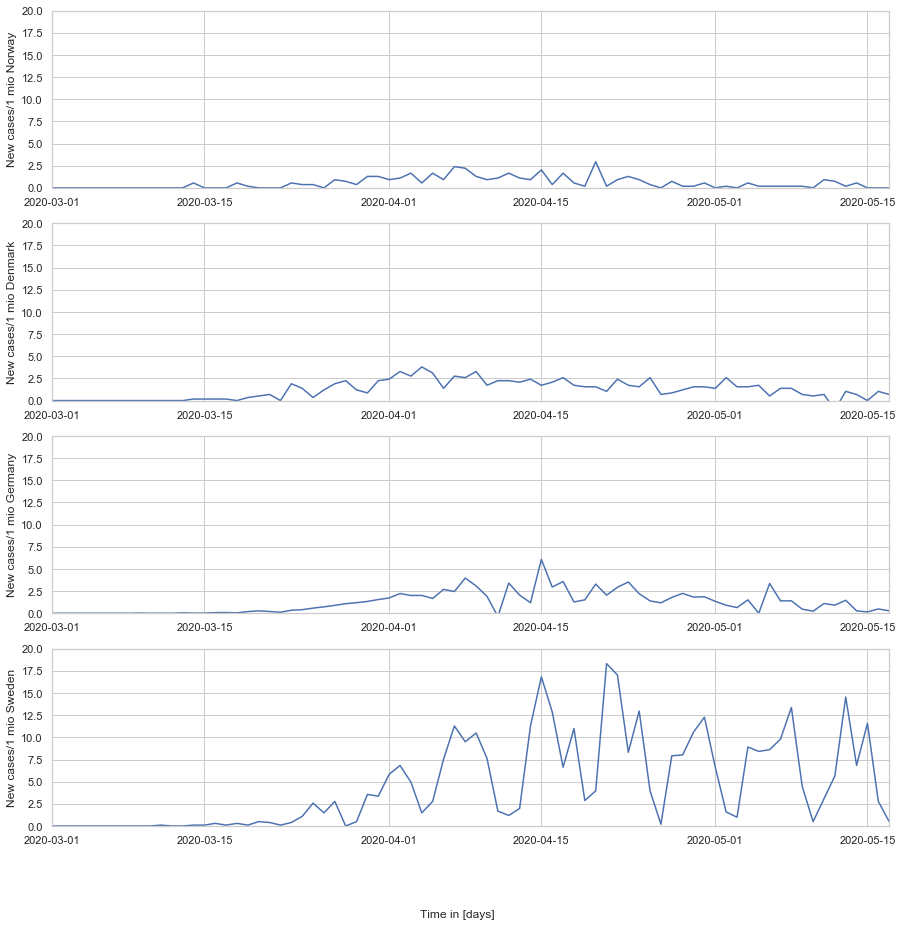

In [34]:
# new confirmed cases per 1m people and day

fig, ax = plt.subplots(4, 1, figsize=(15,15))
  
ax1 = plt.subplot(4,1,1)
plt.plot('date', 'deltaFatalPer1M', data=df_Norway)
ax1.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax1.set_ylim([0,20])
plt.ylabel('New cases/1 mio Norway');

ax2 = plt.subplot(4,1,2)
plt.plot('date', 'deltaFatalPer1M', data=df_Denmark)
ax2.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax2.set_ylim([0,20])
plt.ylabel('New cases/1 mio Denmark');

ax3 = plt.subplot(4,1,3)
plt.plot('date', 'deltaFatalPer1M', data=df_Germany)
ax3.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax3.set_ylim([0,20])
plt.ylabel('New cases/1 mio Germany');

ax4 = plt.subplot(4,1,4)
plt.plot('date', 'deltaFatalPer1M', data=df_Sweden)
ax4.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax4.set_ylim([0,20])
plt.ylabel('New cases/1 mio Sweden');

fig.text(0.5, 0.04, 'Time in [days]', ha='center')


plt.show()

In the graphic above we see the daily new fatal cases related to Covid-19 per one million people per country. Neither on Denmark nor in Norway at any point during the considered period there were reported more than five fatal cases per one million inhabitants per day. Germany has one day with more than five fatal cases per one million people per day. The progression of Swedish fatal cases shows a completely different picture. Here, beginning from April there are frequently days with more than ten reported fatal cases per one million inhabitants per day. There are even days with more than 15 reported cases of fatalities related to Covid-19 per one million inhabitants per day. Other than for the other considered countries we do not see a clear decrease of fatals towards the month of may.

So what did we see so far comparing the northern european countries regarding the spread of the pandemic. First of all, to be able to compare amount of infections and fatals, the metrics have to be relative to the population size. Comparing the confirmed infections of Covid-19 per one million inhabitants between Norway, Sweden, Denmark and Germany we saw that Sweden had about 50 percent more infections per inhabitants compared to Germany and Denmark. Compared to Norway, Sweden had even more than the double amount of confirmed infections relativly to their population size. Taking into account that Denmark tested about 3.5 times more people per population size than Sweden and Norway about twice as much per population as Sweden, the amount of unknown infections in Sweden might even be higher compared to the other considered countries.
Comparing the fatal cases related to Covid-19 per one million inhabitants we saw an even more extreme difference between Sweden and the other northeuropean countries. Sweden had about 3.5 times the amount of fatal cases per inhabitants compared to Germany and Denmark. Compared to Norway, Sweden had up to 7 times more fatal cases related to Covid-19 relativly to their population size.
After looking at the accumulated numbers for May 17th, we decided to look at the timeline of new infections and fatals. Here we saw a steep increase of daily new infections in February and March for Denmark, Norway, Sweden and Germany. After issueing rather strict contact restrictions and school closings around mid of March in Denmark, Norway and Germany, we saw a steep decrease in daily new cases about two weeks after issueing the restrictions. Beginning April the amount of daily new confirmed new cases decreased for Denmark, Norway and Germany. The amount of daily new confirmed infections for Sweden continued increasing up to the end of the observation period May 17th. The two-week delay between the imposition of the measures and the effect of the measures on infection rates can be explained by the incubation period of the virus and the time taken for symptoms to appear and the delay through the reporting chain. 
The course of the number of fatal cases associated with Covid-19 follows roughly the same pattern as the course of new infections, just two weeks delayed. 
In the current form of Covid-19, people usually do not die immediately after infection, provided the virus is detected early. In severe cases of the disease they usually have an average hospital stay of 14 days. Not all patients survive this hospital stay. The approximately two-week offset between peaks in the data of daily new infections and the data of daily new deaths can be explained by the course of the disease ([Quarks](https://www.quarks.de/gesundheit/medizin/langzeitschaeden-von-covid-19-was-wir-wissen-und-was-nicht/), [Matt Arentz](https://jamanetwork.com/journals/jama/article-abstract/2763485)).



In [35]:
# https://www.ukbonn.de/C12582D3002FD21D/vwLookupDownloads/Streeck_et_al_Infection_fatality_rate_of_SARS_CoV_2_infection2.pdf/%24FILE/Streeck_et_al_Infection_fatality_rate_of_SARS_CoV_2_infection2.pdf

In [36]:

# Two dimensional
    # Corona Virus Cases overt time per country line? (umeric discrecte vs numeric continouos) --> zoom in on not extreme countries
    # R-factor of countries over time
    # monthly/weekly deaths compared to "normal years" --> Sweden compared to other nordic countries
    # spread of mortality rate for all countries in dataset
    # why not 
    # compare deaths over weekdays

In [37]:
# all countries with statistics regarding smoking & diabetes

In [38]:
list(df_covidCases_today)

['country',
 'date_x',
 'fatal',
 'confirmed',
 'recovered',
 'iso_code',
 'continent',
 'population',
 'date_y',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_100k',
 'Entity',
 'Cumulative total',
 'Cumulative total per thousand',
 'hospital_beds_per_1000_people',
 'occupancy',
 'ICU-CCB_beds_per_1000_people',
 'ventilators',
 'confirmedPer1MPopulation',
 'fatalPerConfirmed',
 'fatalPer1MPopulation']

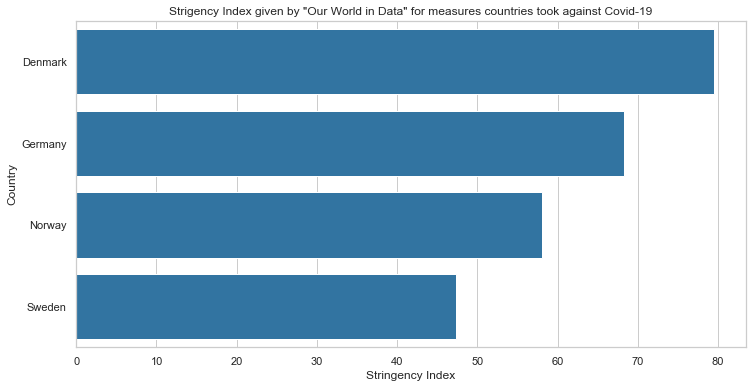

In [39]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('stringency_index', ascending=False), 
           x='stringency_index', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Stringency Index')
plt.ylabel('Country');
plt.title('Strigency Index given by "Our World in Data" for measures countries took against Covid-19')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.
There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found in the association between the 'x', 'y', and 'z' measurements of diamonds to the other linear dimensions as well as to the 'carat' variable. A small negative correlation was observed between table size and depth, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also a small interaction in the categorical quality features. Diamonds of lower clarity appear to have slightly better cut and color grades.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [40]:
# Countries of interest (European countries with more than 40% 1-person households)

northern_southern_european = ['Norway', 'Denmark', 'Germany', 'Sweden', 'Italy', 'Spain', 'France']

In [41]:
# Drop all countries which are not of interest in this analysis

df_householdsEU_Timeline = df_householdsEU_Timeline[df_householdsEU_Timeline['country'].isin(northern_southern_european)]

In [42]:
df_householdsEU_Timeline_2018 = df_householdsEU_Timeline.query('year == "2018"').sort_values('1 person', ascending=False)

In [43]:
df_householdsEU_Timeline_2018

,Unnamed: 0,year,country,1 person,2 persons,3 persons,4 persons,5 persons,6 persons or more
303,303,2018,Norway,46.0,30.1,10.0,9.9,3.4,0.7
286,286,2018,Denmark,44.1,31.8,10.3,9.6,3.6,0.6
311,311,2018,Sweden,42.5,31.2,11.2,10.8,3.1,1.1
290,290,2018,Germany,41.5,34.0,12.0,9.1,2.5,0.9
289,289,2018,France,35.8,32.8,13.3,12.6,3.9,1.5
295,295,2018,Italy,32.6,27.9,19.4,15.8,3.3,1.0
310,310,2018,Spain,25.5,30.4,20.9,17.7,4.1,1.4


#### Distribution of population per household size for different countries

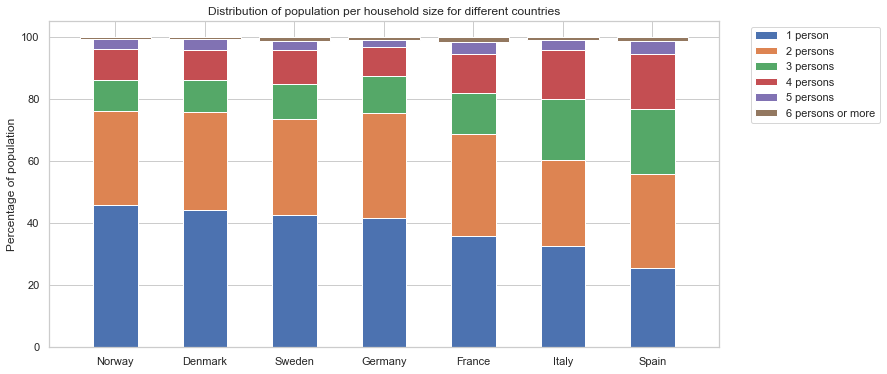

In [46]:
# households for each nordic country (Country, householdtype, share)

# Define figure size
plt.figure(figsize=[12,6])

N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

#plt.style.use(style_name)

p1 = plt.bar(ind, df_householdsEU_Timeline_2018['1 person'], width)
p2 = plt.bar(ind, df_householdsEU_Timeline_2018['2 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person'])
p3 = plt.bar(ind, df_householdsEU_Timeline_2018['3 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons'])
p4 = plt.bar(ind, df_householdsEU_Timeline_2018['4 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons'])
p5 = plt.bar(ind, df_householdsEU_Timeline_2018['5 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons']+df_householdsEU_Timeline_2018['4 persons'])
p6 = plt.bar(ind, df_householdsEU_Timeline_2018['6 persons or more'], 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons']+df_householdsEU_Timeline_2018['4 persons']++df_householdsEU_Timeline_2018['5 persons'])



plt.title('Distribution of population per household size for different countries')
plt.ylabel('Percentage of population')
plt.xticks(ind, ('Norway', 'Denmark', 'Sweden', 'Germany', 'France', 'Italy', 'Spain'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('1 person', '2 persons', '3 persons', '4 persons', '5 persons', '6 persons or more'), 
           bbox_to_anchor=(1.04,1))


plt.show()

In [45]:
# graph of northern countries with stacked confirmed, recovered, fatal

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that higher grades were more prevalent in smaller diamonds, which fetch lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.

### Were there any interesting or surprising interactions between features?

> Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three categorical features. However, the features also aren't fully independent. But it is interesting in something like the 1-carat plot for prices against cut and clarity, the shape of the 'cut' dots is fairly similar for the SI2 through VVS2 clarity levels.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
# cited from: https://www.rrighart.com/blog-covid19/a-jupyter-notebook-for-visualizing-the-covid-19-pandemic

    
    if pop == 'area' or pop == 'inhabitants': 
        dat[pop] = dat[pop].div(number)
        dat['yvalue'] = dat['metric'].div(dat[pop])
    else: dat['yvalue'] = dat['metric'].copy() 
    
    dat = dat[(dat['date']>=date1) & (dat['date']<=date2)]
    colors = mpl.cm.tab20(np.linspace(0,1,len(countries)))
    plt.figure(figsize = (16, 8))

    countries = list(dat.loc[(dat['Country/Region'].isin(countries)) & (dat['date']==dat['date'].max()), ['Country/Region', 'yvalue']].sort_values(by='yvalue', ascending=False)['Country/Region'])
    
    for i,j in zip(countries, np.arange(0,len(countries))):
        plt.plot(dat[dat['Country/Region'] == i]['date'], dat[dat['Country/Region'] == i]['yvalue'], label=i, marker='o', color=colors[j])
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of '+filename+' Cases')
    plt.title(title, fontsize=16)
   
    plt.legend()
    plt.savefig('covid.png')